<b>Data Analysis and Business Management</b>
    
<b>Crypto Price Analysis and World Financial Order</b>
    
This project is divided in two sections. In the first section we will look at existing crypto data (XRP) and apply data analytics techniques to uncover trends and identify patterns. In the second section, we will do market research and answer questions related to the world financial order.

### <b>Section 1: Data Analysis</b>

  <b>1</b>.Collect data for 2022 (months 1-9 i.e. Jan-Sep) from the link below:
    https://data.binance.vision/?prefix=data/spot/monthly/klines/XRPUSDT/1d/
    Download Files: XRPUSDT-1d-2022-09.zip - XRPUSDT-1d-2022-01.zip
    Unzip
    Combine the 9 files to create a single CSV file

  <b>2</b>.Import the data in an Excel or Google spreadsheet
    This data is representing the SPOT -> Klines , for which you can read here: https://github.com/binance/binance-public-data/

  <b>3.</b>Specify the parameters and explain what each of them means. Add them as the header row for your data.</b>

  <b>4.</b>Clean the data for duplicates, missing values and any formatting errors. Specify a summary of cleaning done and results achieved.

  <b>5.</b>Perform descriptive analysis to specify the important statistics <b>(like min, max, average, median, standard deviation) </b>for the different parameters of price, volume etc. Also specify the distribution of data and identify the first, second and third quartiles. 
  
    BONUS 1: What additional statistical information will be meaningful. Give formula and calculate values. 
  
    BONUS2: Read about RSI, and calculate RSI for your data.

<b>6.</b>Use exploratory analysis to identify the following patterns and answer the following questions (use pivot tables):

          What is the trend in price data?
          
          What is the volume trend?
          
          Are there certain days in the month where volume is higher/ lower than normal? 
          
          Are there certain months where prices are higher / lower than normal?
          
          Is there a correlation between “Volume” and “Quote Asset Volume”? 
          
          Is there a trend in “Number of trades”? What does it specify?

          Based on the data given, predict the price of XRPUSDT in the next months.

          Use charts to visualize the above information - is there anything that stands out?

Create a presentation to present your findings.



### Data Description:

 - <b>Open time</b> - The open is the starting period of trading on a securities exchange or organized over-the-counter market. 
 
  
 - <b>Open</b> - open price of the day
 
   
 - <b>High</b>- the highest price of the day
 
   
 - <b>Low</b>- the lowest price of the day
 
   
 - <b>Close</b>	-close price of the day
 
  
 - <b>Volume</b> - used to recod the number of the number of shares traded on trading day.
 
  
 - <b>Close time</b>
 
  
 - <b>Quote asset volume</b> The current trade volume in a base and quote currency is calculated for the last 24 hours for each pair on all exchanges and converted to USD using COIN360's prices.
  
  
 - <b>Number of trades</b> - shows how many trades were placed on a security for a particular day.
 
  
 - <b>Taker buy base asset volume</b> - represents how many of the total base asset volume are contributed by the taker buy orders.
 
  
 - <b>Taker buy quote asset volume</b>	When takers sell at the ask price, the amount of assets traded contributes to the taker buy volume. This volume pushes up the price. If the current market has more taker buy volume than taker sell volume, it means there is a tendency to increase the price as more trades occur at the ask price.
  
  
 - <b>Ignore</b>

## Data preparation

In [86]:
!pip3 install catboost

In [87]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import time
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, Pool
import lightgbm as lgb
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import time

In [88]:
data = pd.read_excel(r"C:\Users\natal\OneDrive\Рабочий стол\final (2).xlsx", engine='openpyxl')


In [89]:
data.head(15)

,Month,Open time,open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,QUARTILE1,QUARTILE2,QUARTILE3
0,2022-01-01,2022-01-01,0.8298,0.8557,0.8297,0.8507,136976730.0,2022-01-01 23:59:59,1.155075e+08,178238,70090109.0,5.911341e+07,0,0.3594,0.4682,0.7543
1,2022-01-01,2022-01-02,0.8508,0.8667,0.8372,0.8586,129688032.0,2022-01-02 23:59:59,1.102656e+08,176940,65996017.0,5.611762e+07,0,NaN,NaN,NaN
2,2022-01-01,2022-01-03,0.8586,0.8587,0.8213,0.8324,178618617.0,2022-01-03 23:59:59,1.498761e+08,232484,89735857.0,7.529882e+07,0,NaN,NaN,NaN
3,2022-01-01,2022-01-04,0.8324,0.8456,0.7794,0.8228,214415744.0,2022-01-04 23:59:59,1.776919e+08,270966,104076850.0,8.636767e+07,0,NaN,NaN,NaN
4,2022-01-01,2022-01-05,0.8227,0.8372,0.7092,0.7726,370612510.0,2022-01-05 23:59:59,2.947838e+08,482373,173152247.0,1.379976e+08,0,NaN,NaN,NaN
5,2022-01-01,2022-01-06,0.7725,0.7909,0.7377,0.7791,307202277.0,2022-01-06 23:59:59,2.344020e+08,415169,151109632.0,1.152832e+08,0,NaN,NaN,NaN
6,2022-01-01,2022-01-07,0.7790,0.7808,0.7287,0.7634,372926762.0,2022-01-07 23:59:59,2.819197e+08,511973,177050288.0,1.338903e+08,0,NaN,NaN,NaN
7,2022-01-01,2022-01-08,0.7634,0.7768,0.7222,0.7452,253028571.0,2022-01-08 23:59:59,1.902131e+08,347309,122226022.0,9.191199e+07,0,NaN,NaN,NaN
8,2022-01-01,2022-01-09,0.7452,0.7667,0.7381,0.7530,151521399.0,2022-01-09 23:59:59,1.138884e+08,211515,74010465.0,5.563336e+07,0,NaN,NaN,NaN
9,2022-01-01,2022-01-10,0.7530,0.7589,0.6967,0.7399,313080154.0,2022-01-10 23:59:59,2.287305e+08,359880,155055910.0,1.133546e+08,0,NaN,NaN,NaN


In [90]:
#data.sort_index(inplace=True)
#print(data.index.is_monotonic)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Month                         273 non-null    datetime64[ns]
 1   Open time                     273 non-null    datetime64[ns]
 2   open                          273 non-null    float64       
 3   High                          273 non-null    float64       
 4   Low                           273 non-null    float64       
 5   Close                         273 non-null    float64       
 6   Volume                        273 non-null    float64       
 7   Close time                    273 non-null    datetime64[ns]
 8   Quote asset volume            273 non-null    float64       
 9   Number of trades              273 non-null    int64         
 10  Taker buy base asset volume   273 non-null    float64       
 11  Taker buy quote asset volume  27

In [92]:
data = data.drop(['Month','QUARTILE1', 'QUARTILE2', 'QUARTILE3'],axis=1)

In [93]:
data.describe()


,open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0


In [94]:
data.median()

open                            4.682000e-01
High                            5.000000e-01
Low                             4.266000e-01
Close                           4.683000e-01
Volume                          2.934266e+08
Quote asset volume              1.531215e+08
Number of trades                2.115150e+05
Taker buy base asset volume     1.480592e+08
Taker buy quote asset volume    7.695969e+07
Ignore                          0.000000e+00
dtype: float64

In [95]:
data.isnull().values.any().sum()

0

In [96]:
data.duplicated().sum()

0

In [97]:
data.columns

Index(['Open time', 'open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

<b>The usual recommendation for column names is :use Latin in the name, lower case, and no spaces in the columns name.</b>

In [98]:
col_name = ['open_time', 'open_price', 'high_price', 'low_price', 'close_price', 'volume',
       'close_time', 'quote_asset_volume', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
       'ignore']

In [99]:
data.set_axis(col_name, axis = 'columns', inplace = True)

data.columns

Index(['open_time', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'close_time', 'quote_asset_volume', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
       'ignore'],
      dtype='object')

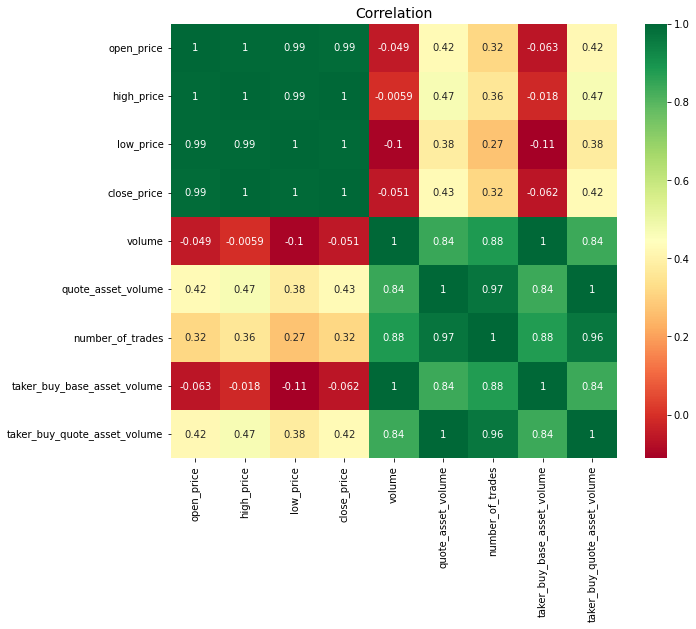

In [100]:
plt.figure(figsize=(10,8))
numeric = data.drop(['ignore'], axis=1)
sns.heatmap(numeric.corr(), cmap='RdYlGn', annot=True)
plt.title('Correlation', fontsize=14)
plt.show()

In [101]:
#Посмотрим на формат даты
data['date'] = pd.to_datetime(data['open_time'])
data['month'] = data['open_time'].dt.month
data['year'] = data['open_time'].dt.year
data['day'] = data['open_time'].dt.day


In [102]:

months_map = {1: 'january', 2 : 'february', 3: 'march', 4:'april', 5 :'may', 6 : 'june', 7 :'july', 8:'august', 9: 'september'}

data['month'] = data['month'].apply(lambda x: months_map[x])

data['month'].value_counts(ascending=False)

january      31
march        31
may          31
july         31
august       31
april        30
june         30
september    30
february     28
Name: month, dtype: int64

In [103]:
#the difdifferent between the and closing prices of a trading period
data['diff'] = data.open_price - data.close_price
print(data['diff'])

0     -0.0209
1     -0.0078
2      0.0262
3      0.0096
4      0.0501
        ...  
268    0.0233
269    0.0225
270   -0.0031
271   -0.0386
272    0.0077
Name: diff, Length: 273, dtype: float64


In [104]:
data.head(5)

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,date,month,year,day,diff
0,2022-01-01,0.8298,0.8557,0.8297,0.8507,136976730.0,2022-01-01 23:59:59,1.155075e+08,178238,70090109.0,5.911341e+07,0,2022-01-01,january,2022,1,-0.0209
1,2022-01-02,0.8508,0.8667,0.8372,0.8586,129688032.0,2022-01-02 23:59:59,1.102656e+08,176940,65996017.0,5.611762e+07,0,2022-01-02,january,2022,2,-0.0078
2,2022-01-03,0.8586,0.8587,0.8213,0.8324,178618617.0,2022-01-03 23:59:59,1.498761e+08,232484,89735857.0,7.529882e+07,0,2022-01-03,january,2022,3,0.0262
3,2022-01-04,0.8324,0.8456,0.7794,0.8228,214415744.0,2022-01-04 23:59:59,1.776919e+08,270966,104076850.0,8.636767e+07,0,2022-01-04,january,2022,4,0.0096
4,2022-01-05,0.8227,0.8372,0.7092,0.7726,370612510.0,2022-01-05 23:59:59,2.947838e+08,482373,173152247.0,1.379976e+08,0,2022-01-05,january,2022,5,0.0501


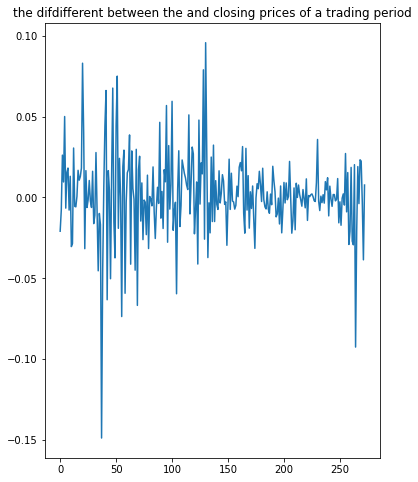

In [105]:
plt.figure(figsize=(6,8))
data['diff'].plot()
plt.title('the difdifferent between the and closing prices of a trading period')
plt.show()

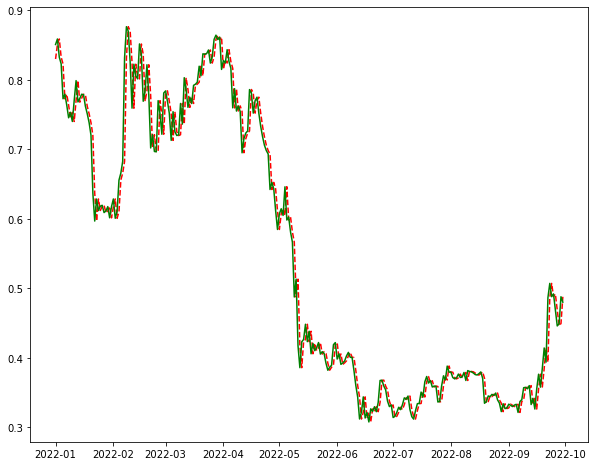

In [106]:
fig, ax = plt.subplots(figsize=(10,8))
y = np.array(data['open_price'])
x = np.array(data['date'])
y2 = np.array(data['close_price'])
x2 = np.array(data['date'])

plt.plot(x,y,'--r')
plt.plot(x2,y2,'g')

plt.show()

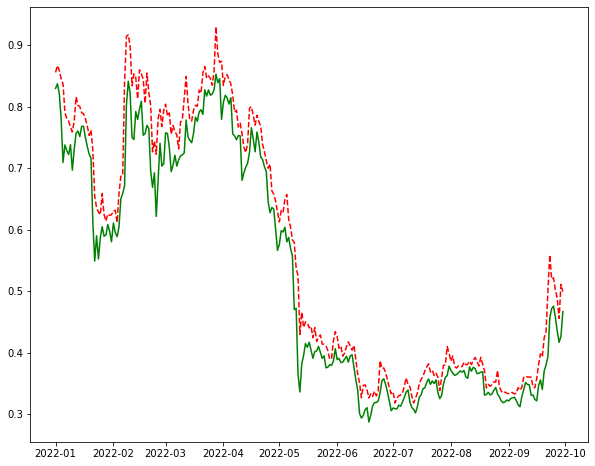

In [107]:
fig, ax = plt.subplots(figsize=(10,8))
y = np.array(data['high_price'])
x = np.array(data['date'])
y2 = np.array(data['low_price'])
x2 = np.array(data['date'])

plt.plot(x,y,'--r')
plt.plot(x2,y2,'g')

plt.show()

fig, ax = plt.subplots(figsize=(10,8))
y = np.array(data['number_of_trades'])
x = np.array(data['date'])
y2 = np.array(data['quote_asset_volume'])
x2 = np.array(data['date'])

plt.plot(x,y,'--r')
plt.plot(x2,y2,'g')

plt.show()

<b>The relative strength index (RSI) is a technical indicator that measures the momentum of a security based on its closing prices. Once calculated, the RSI is displayed as an oscillator, which is a line graph between two extreme values. In the case of RSI, those extremes are 0 and 100.</b>

Calculation for RSI

Average gain   =  sum of gains in the last 14 days/14

Average loss  =  sum of losses in the last 14 days/14

Relative Strength (RS)  = Average Gain / Average Loss

RSI =  100 – 100 / (1+RS)


In [109]:
data['Change'] = (data['close_price'].shift(-1)-data['close_price']).shift(1)
data['Change_Average'] = data['Change'].rolling(window=2).mean()
data['Change_Average+'] = data.apply(lambda x: x['Change_Average'] if x['Change_Average'] > 0 else 0,axis=1).rolling(window=14).mean()
data['Change_Average-'] = data.apply(lambda x: x['Change_Average'] if x['Change_Average'] < 0 else 0,axis=1).rolling(window=14).mean()*-1
data['RSI'] = 100-(100/(1+(data['Change_Average+']/data['Change_Average-'])))

In [110]:
print(data['RSI'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
268    79.936461
269    75.612575
270    75.420798
271    78.665814
272    79.424460
Name: RSI, Length: 273, dtype: float64


In [111]:
data['RSI'].isnull().values.any().sum()

1

In [112]:
#print(data.head(5))
print(data.tail(40))


     open_time  open_price  high_price  low_price  close_price        volume  \
233 2022-08-22      0.3448      0.3453     0.3313       0.3440  2.591251e+08   
234 2022-08-23      0.3440      0.3480     0.3326       0.3472  2.248448e+08   
235 2022-08-24      0.3473      0.3525     0.3389       0.3456  1.907607e+08   
236 2022-08-25      0.3456      0.3522     0.3435       0.3491  2.008311e+08   
237 2022-08-26      0.3491      0.3712     0.3325       0.3393  4.392118e+08   
238 2022-08-27      0.3393      0.3447     0.3283       0.3346  1.758715e+08   
239 2022-08-28      0.3346      0.3373     0.3213       0.3224  1.489846e+08   
240 2022-08-29      0.3223      0.3342     0.3186       0.3337  2.688563e+08   
241 2022-08-30      0.3337      0.3359     0.3200       0.3267  2.138791e+08   
242 2022-08-31      0.3268      0.3339     0.3230       0.3277  1.950438e+08   
243 2022-09-01      0.3276      0.3334     0.3215       0.3331  1.835650e+08   
244 2022-09-02      0.3332      0.3355  

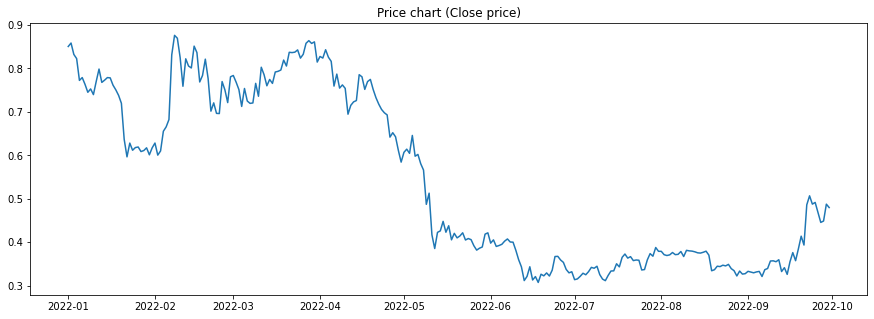

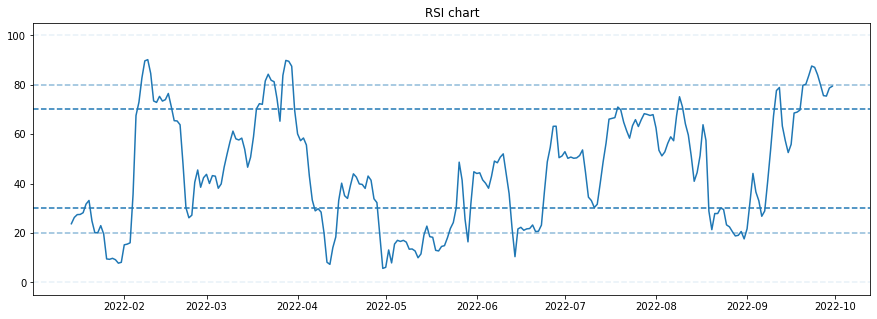

In [113]:


# plot price
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['close_price'])
plt.title('Price chart (Close price)')
plt.show()


# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('RSI chart')
plt.plot(data['date'], data['RSI'])

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()


In [114]:

data.sample(10)

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,...,date,month,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
219,2022-08-08,0.3723,0.3847,0.3710,0.3787,221476216.0,2022-08-08 23:59:59,8.397959e+07,128662,115977396.0,...,2022-08-08,august,2022,8,-0.0064,0.0065,0.00360,0.003868,0.001864,67.476636
29,2022-01-30,0.6175,0.6232,0.5973,0.6013,146491081.0,2022-01-30 23:59:59,8.963442e+07,155232,69182128.0,...,2022-01-30,january,2022,30,0.0162,-0.0161,-0.00490,0.001118,0.013218,7.797708
144,2022-05-25,0.4087,0.4138,0.3948,0.4060,414339536.0,2022-05-25 23:59:59,1.679694e+08,161858,197113019.0,...,2022-05-25,may,2022,25,0.0027,-0.0026,0.00040,0.003161,0.007289,30.246070
199,2022-07-19,0.3652,0.3767,0.3515,0.3729,372635897.0,2022-07-19 23:59:59,1.354338e+08,240551,190787717.0,...,2022-07-19,july,2022,19,-0.0077,0.0076,0.01480,0.005089,0.002079,71.001495
233,2022-08-22,0.3448,0.3453,0.3313,0.3440,259125051.0,2022-08-22 23:59:59,8.741117e+07,139631,134395867.0,...,2022-08-22,august,2022,22,0.0008,-0.0009,0.00360,0.001396,0.003611,27.888730
171,2022-06-21,0.3226,0.3374,0.3187,0.3294,379691157.0,2022-06-21 23:59:59,1.248527e+08,187784,202444640.0,...,2022-06-21,june,2022,21,-0.0068,0.0067,0.00150,0.001979,0.007625,20.602454
253,2022-09-11,0.3574,0.3604,0.3485,0.3552,146159090.0,2022-09-11 23:59:59,5.191962e+07,86088,73913953.0,...,2022-09-11,september,2022,11,0.0022,-0.0021,-0.00080,0.002782,0.000800,77.666999
259,2022-09-17,0.3552,0.3810,0.3464,0.3762,443007880.0,2022-09-17 23:59:59,1.620503e+08,247164,214475018.0,...,2022-09-17,september,2022,17,-0.0210,0.0210,0.02505,0.004636,0.002125,68.568410
261,2022-09-19,0.3578,0.3932,0.3401,0.3848,737172977.0,2022-09-19 23:59:59,2.658449e+08,451339,377962935.0,...,2022-09-19,september,2022,19,-0.0270,0.0272,0.00430,0.004904,0.002125,69.766260
24,2022-01-25,0.6118,0.6243,0.5872,0.6180,319618429.0,2022-01-25 23:59:59,1.929807e+08,298398,157355880.0,...,2022-01-25,january,2022,25,-0.0062,0.0062,-0.00515,0.003225,0.013239,19.587852


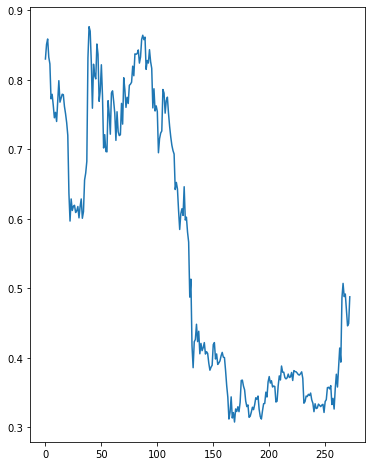

In [115]:
plt.figure(figsize=(6,8))
data['open_price'].plot()
plt.show()

In [118]:
data_new = data.copy()
data_frame = data.copy()
data["rolling_mean"] = data["close_price"].rolling(20).mean()
data["rolling_std"] = data["close_price"].rolling(20).std()

In [119]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['close_price'].shift(lag)
    
data['rolling_mean'] = data['close_price'].shift().rolling(rolling_mean_size).mean()


NameError: name 'rolling_mean_size' is not defined

In [72]:
min_of_hifhest = data['high_price'].min()
min_of_lowest = data['low_price'].min()
min_of_hifhest

0.3181

In [73]:
data_january = data.loc[:'january']
data_january.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0,273.0,273.000000,273.000000,272.000000,271.000000,260.000000,260.000000,260.000000
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0,2022.0,15.681319,0.001280,-0.001363,-0.001368,0.005171,0.006541,44.634335
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0,0.0,8.792392,0.025942,0.025954,0.017844,0.004718,0.004660,22.415000
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0,2022.0,1.000000,-0.148900,-0.095800,-0.063700,0.000764,0.000729,5.692418
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0,2022.0,8.000000,-0.008100,-0.014900,-0.009100,0.002221,0.002640,24.114654
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0,2022.0,16.000000,0.000000,-0.000250,-0.001150,0.003568,0.004414,43.494403
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0,2022.0,23.000000,0.014800,0.008025,0.005600,0.006414,0.009909,63.339777
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0,2022.0,31.000000,0.095800,0.148900,0.096900,0.023679,0.019771,90.175328


In [74]:
data_february = data.loc[:'february']
data_february.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0,273.0,273.000000,273.000000,272.000000,271.000000,260.000000,260.000000,260.000000
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0,2022.0,15.681319,0.001280,-0.001363,-0.001368,0.005171,0.006541,44.634335
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0,0.0,8.792392,0.025942,0.025954,0.017844,0.004718,0.004660,22.415000
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0,2022.0,1.000000,-0.148900,-0.095800,-0.063700,0.000764,0.000729,5.692418
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0,2022.0,8.000000,-0.008100,-0.014900,-0.009100,0.002221,0.002640,24.114654
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0,2022.0,16.000000,0.000000,-0.000250,-0.001150,0.003568,0.004414,43.494403
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0,2022.0,23.000000,0.014800,0.008025,0.005600,0.006414,0.009909,63.339777
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0,2022.0,31.000000,0.095800,0.148900,0.096900,0.023679,0.019771,90.175328


In [75]:
data_march = data.loc[:'march']
data_march.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0,273.0,273.000000,273.000000,272.000000,271.000000,260.000000,260.000000,260.000000
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0,2022.0,15.681319,0.001280,-0.001363,-0.001368,0.005171,0.006541,44.634335
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0,0.0,8.792392,0.025942,0.025954,0.017844,0.004718,0.004660,22.415000
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0,2022.0,1.000000,-0.148900,-0.095800,-0.063700,0.000764,0.000729,5.692418
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0,2022.0,8.000000,-0.008100,-0.014900,-0.009100,0.002221,0.002640,24.114654
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0,2022.0,16.000000,0.000000,-0.000250,-0.001150,0.003568,0.004414,43.494403
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0,2022.0,23.000000,0.014800,0.008025,0.005600,0.006414,0.009909,63.339777
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0,2022.0,31.000000,0.095800,0.148900,0.096900,0.023679,0.019771,90.175328


In [76]:
data_april = data.loc[:'april']
data_april.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0,273.0,273.000000,273.000000,272.000000,271.000000,260.000000,260.000000,260.000000
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0,2022.0,15.681319,0.001280,-0.001363,-0.001368,0.005171,0.006541,44.634335
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0,0.0,8.792392,0.025942,0.025954,0.017844,0.004718,0.004660,22.415000
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0,2022.0,1.000000,-0.148900,-0.095800,-0.063700,0.000764,0.000729,5.692418
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0,2022.0,8.000000,-0.008100,-0.014900,-0.009100,0.002221,0.002640,24.114654
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0,2022.0,16.000000,0.000000,-0.000250,-0.001150,0.003568,0.004414,43.494403
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0,2022.0,23.000000,0.014800,0.008025,0.005600,0.006414,0.009909,63.339777
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0,2022.0,31.000000,0.095800,0.148900,0.096900,0.023679,0.019771,90.175328


In [77]:
data_may = data.loc[:'may']
data_may.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0,273.0,273.000000,273.000000,272.000000,271.000000,260.000000,260.000000,260.000000
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0,2022.0,15.681319,0.001280,-0.001363,-0.001368,0.005171,0.006541,44.634335
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0,0.0,8.792392,0.025942,0.025954,0.017844,0.004718,0.004660,22.415000
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0,2022.0,1.000000,-0.148900,-0.095800,-0.063700,0.000764,0.000729,5.692418
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0,2022.0,8.000000,-0.008100,-0.014900,-0.009100,0.002221,0.002640,24.114654
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0,2022.0,16.000000,0.000000,-0.000250,-0.001150,0.003568,0.004414,43.494403
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0,2022.0,23.000000,0.014800,0.008025,0.005600,0.006414,0.009909,63.339777
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0,2022.0,31.000000,0.095800,0.148900,0.096900,0.023679,0.019771,90.175328


In [78]:
data_june = data.loc[:'june']
data_june.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0,273.0,273.000000,273.000000,272.000000,271.000000,260.000000,260.000000,260.000000
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0,2022.0,15.681319,0.001280,-0.001363,-0.001368,0.005171,0.006541,44.634335
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0,0.0,8.792392,0.025942,0.025954,0.017844,0.004718,0.004660,22.415000
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0,2022.0,1.000000,-0.148900,-0.095800,-0.063700,0.000764,0.000729,5.692418
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0,2022.0,8.000000,-0.008100,-0.014900,-0.009100,0.002221,0.002640,24.114654
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0,2022.0,16.000000,0.000000,-0.000250,-0.001150,0.003568,0.004414,43.494403
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0,2022.0,23.000000,0.014800,0.008025,0.005600,0.006414,0.009909,63.339777
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0,2022.0,31.000000,0.095800,0.148900,0.096900,0.023679,0.019771,90.175328


In [79]:
data_july = data.loc[:'july']
data_july.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0,273.0,273.000000,273.000000,272.000000,271.000000,260.000000,260.000000,260.000000
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0,2022.0,15.681319,0.001280,-0.001363,-0.001368,0.005171,0.006541,44.634335
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0,0.0,8.792392,0.025942,0.025954,0.017844,0.004718,0.004660,22.415000
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0,2022.0,1.000000,-0.148900,-0.095800,-0.063700,0.000764,0.000729,5.692418
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0,2022.0,8.000000,-0.008100,-0.014900,-0.009100,0.002221,0.002640,24.114654
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0,2022.0,16.000000,0.000000,-0.000250,-0.001150,0.003568,0.004414,43.494403
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0,2022.0,23.000000,0.014800,0.008025,0.005600,0.006414,0.009909,63.339777
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0,2022.0,31.000000,0.095800,0.148900,0.096900,0.023679,0.019771,90.175328


In [80]:
data_august = data.loc[:'august']
data_august.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0,273.0,273.000000,273.000000,272.000000,271.000000,260.000000,260.000000,260.000000
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0,2022.0,15.681319,0.001280,-0.001363,-0.001368,0.005171,0.006541,44.634335
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0,0.0,8.792392,0.025942,0.025954,0.017844,0.004718,0.004660,22.415000
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0,2022.0,1.000000,-0.148900,-0.095800,-0.063700,0.000764,0.000729,5.692418
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0,2022.0,8.000000,-0.008100,-0.014900,-0.009100,0.002221,0.002640,24.114654
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0,2022.0,16.000000,0.000000,-0.000250,-0.001150,0.003568,0.004414,43.494403
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0,2022.0,23.000000,0.014800,0.008025,0.005600,0.006414,0.009909,63.339777
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0,2022.0,31.000000,0.095800,0.148900,0.096900,0.023679,0.019771,90.175328


In [81]:
data_september = data.loc[:'september']
data_september.describe()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,year,day,diff,Change,Change_Average,Change_Average+,Change_Average-,RSI
count,273.000000,273.000000,273.000000,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.0,273.0,273.000000,273.000000,272.000000,271.000000,260.000000,260.000000,260.000000
mean,0.546289,0.563501,0.525824,0.545008,3.517063e+08,1.890880e+08,2.701096e+05,1.747088e+08,9.370019e+07,0.0,2022.0,15.681319,0.001280,-0.001363,-0.001368,0.005171,0.006541,44.634335
std,0.196879,0.202510,0.190404,0.196167,2.354885e+08,1.342088e+08,1.960059e+05,1.145790e+08,6.573849e+07,0.0,0.0,8.792392,0.025942,0.025954,0.017844,0.004718,0.004660,22.415000
min,0.307400,0.318100,0.287200,0.307500,8.865848e+07,3.168222e+07,5.800500e+04,4.240544e+07,1.542751e+07,0.0,2022.0,1.000000,-0.148900,-0.095800,-0.063700,0.000764,0.000729,5.692418
25%,0.359400,0.371200,0.348500,0.359400,2.122546e+08,9.728767e+07,1.489520e+05,1.047440e+08,4.923940e+07,0.0,2022.0,8.000000,-0.008100,-0.014900,-0.009100,0.002221,0.002640,24.114654
50%,0.468200,0.500000,0.426600,0.468300,2.934266e+08,1.531215e+08,2.115150e+05,1.480592e+08,7.695969e+07,0.0,2022.0,16.000000,0.000000,-0.000250,-0.001150,0.003568,0.004414,43.494403
75%,0.754300,0.776800,0.725000,0.754000,3.994348e+08,2.434648e+08,3.280300e+05,2.019241e+08,1.202128e+08,0.0,2022.0,23.000000,0.014800,0.008025,0.005600,0.006414,0.009909,63.339777
max,0.876300,0.930000,0.852800,0.876300,1.820626e+09,9.177689e+08,1.336231e+06,8.986153e+08,4.578560e+08,0.0,2022.0,31.000000,0.095800,0.148900,0.096900,0.023679,0.019771,90.175328


In [82]:
!pip install alpaca-trade-api 

 def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['close_price'].shift(lag)
    
data['rolling_mean'] = data['close_price'].shift().rolling(rolling_mean_size).mean()
